>  Loading the Dataset

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/anshalsingh/petrocoder-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


100%|██████████| 3.54M/3.54M [00:00<00:00, 153MB/s]

- Or just upload the data and give the path

> Importing necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style('darkgrid')

## Reading and fixing dataset

In [66]:
df=pd.read_csv('./petrocoder-dataset/tech_challenge2021_train.csv')
test=pd.read_csv('./petrocoder-dataset/tech_challenge2021_test.csv')

In [6]:
df.sample(3)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
51074,USROP_A 2 N-SH_F-14d,2792.882,4.935427,17082.00073,11.100000,3.860000,99.660004,1985.219970,1.300000,215.9,138.956732,2735.482159,19.900
155407,USROP_A 4 N-SH_F-15Sd,3503.923,13.898070,21563.35343,17.178213,14.587728,251.920000,2016.072577,1.330000,215.9,132.557834,2833.655801,11.140
115580,USROP_A 3 N-SH-F-15d,3801.161,12.841654,16025.51885,26.851974,34.517381,139.736000,2077.184268,11.266297,215.9,133.884138,3001.030015,25.263


In [7]:
print(df.shape,test.shape)

(198928, 13) (114299, 12)


In [8]:
test.sample(3)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
28628,TC-2021-TW,2901.239,11.648252,22614.39024,21.801553,169.00,3491.436904,1.33,311.15,152.865165,2488.772467,53.560
34825,TC-2021-TW,3112.148,15.100090,22750.21695,24.160676,169.33,3491.436904,1.33,311.15,144.401131,2590.169064,38.090
108167,TC-2021-TW,4556.760,9.901921,23272.63271,29.516157,199.39,2513.551422,1.30,215.90,132.494331,2727.396120,4.746


In [9]:
#Checking for null values
df.isnull().sum().sum()

0

In [10]:
test.isnull().sum().sum()

0

In [11]:
df.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198928 entries, 0 to 198927
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Well Identifier                 198928 non-null  object 
 1   Measured Depth m                198928 non-null  float64
 2   Weight on Bit kkgf              198928 non-null  float64
 3   Average Standpipe Pressure kPa  198928 non-null  float64
 4   Average Surface Torque kN.m     198928 non-null  float64
 5   Rate of Penetration m/h         198928 non-null  float64
 6   Average Rotary Speed rpm        198928 non-null  float64
 7   Mud Flow In L/min               198928 non-null  float64
 8   Mud Density In g/cm3            198928 non-null  float64
 9   Diameter mm                     198928 non-null  float64
 10  Average Hookload kkgf           198928 non-null  float64
 11  Hole Depth (TVD) m              198928 non-null  float64
 12  USROP Gamma gAPI

## Exploratory Data Analysis

> Info about the attributes

- Well Identifier: - ID for identifying a particular Well
- Measured Depth, m: - The length of the wellbore, as if determined by a measuring stick.
- Weight on Bit, kkgf: - Weight on the Bit, or WOB, is the amount of downward force exerted on the drill bit provided by thick-walled tubular pieces in the drilling assembly that are known as drill collars. The downward force of gravity on these steel tubes provide force for the drill bit in order to effectively break the rock.
- Average Standpipe Pressure, kPa: - Standpipe pressure (SPP) is the total pressure loss in a system that occurs due to fluid friction.
- Average Surface Torque, kNm: - Torque, is the rotational force between the drill string and the formation.
- Rate of Penetration, m/h: - In the drilling industry, the rate of penetration (ROP), also known as penetration rate or drill rate, is the speed at which a drill bit breaks the rock under it to deepen the borehole. It is normally measured in feet per minute or meters per hour, but sometimes it is expressed in minutes per foot.
- Average Rotary Speed, rpm: - Rotational speed of drill bit
- Mud Flow, L/min: - The rate of mud flowing into the well during drilling.
- Mud Density, g/cm3: - The mass per unit volume of a drilling fluid, synonymous with mud weight. Mud weight controls hydrostatic pressure in a wellbore and prevents unwanted flow into the well.
- Diameter, mm: - Diameter refers to the nominal wellbore diameter.
- Average Hookload, kkgf: - The total force pulling down on the hook. This total force includes the weight of the drillstring in air, the drill collars and any ancillary equipment, reduced by any force that tends to reduce that weight.
- Hole Depth (TVD), m: - The vertical distance from a point in the well (usually the current or final depth) to a point at the surface.
- USROP Gamma, gAPI.There was no unified gamma reading between all the wells, hence a new attribute, USROP Gamma, was introduced. It contains data logged under different names and different equipment, sometimes even within the same well.

In [67]:
un_wells=df['Well Identifier'].value_counts()
un_wells

USROP_A 3 N-SH-F-15d     53041
USROP_A 4 N-SH_F-15Sd    51708
USROP_A 2 N-SH_F-14d     47645
USROP_A 5 N-SH-F-5d      18548
USROP_A 0 N-NA_F-9_Ad    13746
USROP_A 6 N-SH_F-9d       7851
USROP_A 1 N-S_F-7d        6389
Name: Well Identifier, dtype: int64

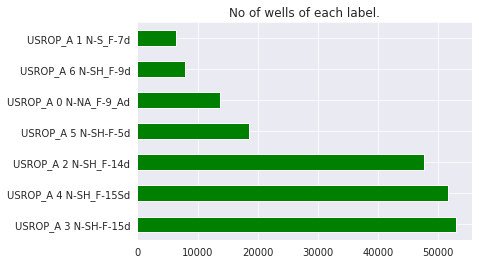

In [68]:
un_wells.plot(kind='barh',color='green')
plt.title("No of wells of each label.")
plt.show()

In [69]:
#dropping Identifier
df=df.drop(columns=['Well Identifier'])
test=test.drop(columns=['Well Identifier'])

In [70]:
l1=list(df.columns)
l1

['Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI']

In [71]:
df.shape

(198928, 12)

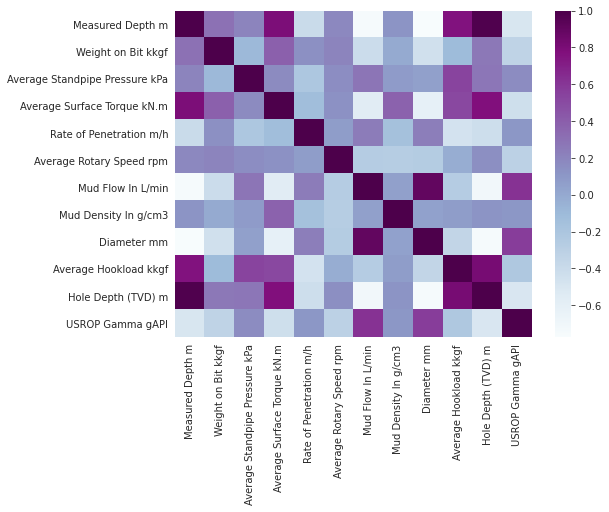

In [18]:
#Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='BuPu')
plt.show()

> 'Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h'

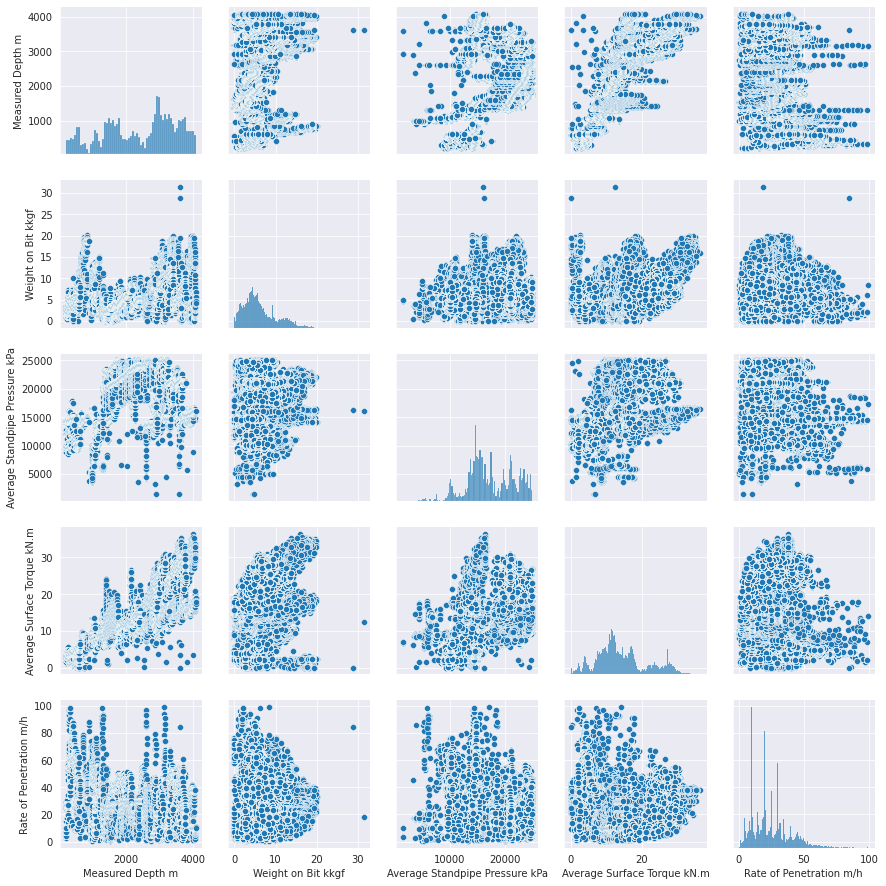

In [80]:
sns.pairplot(data=df[['Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h']])
plt.show()

> 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm'

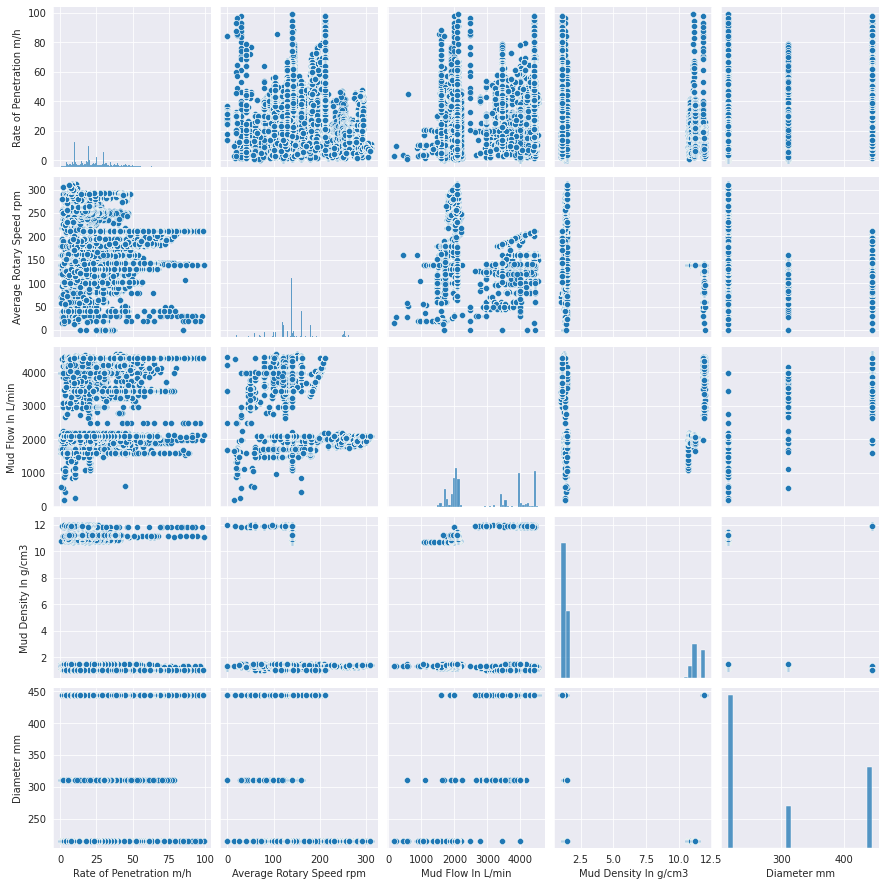

In [82]:
sns.pairplot(df[['Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm']])
plt.show()

> 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI','Rate of Penetration m/h'

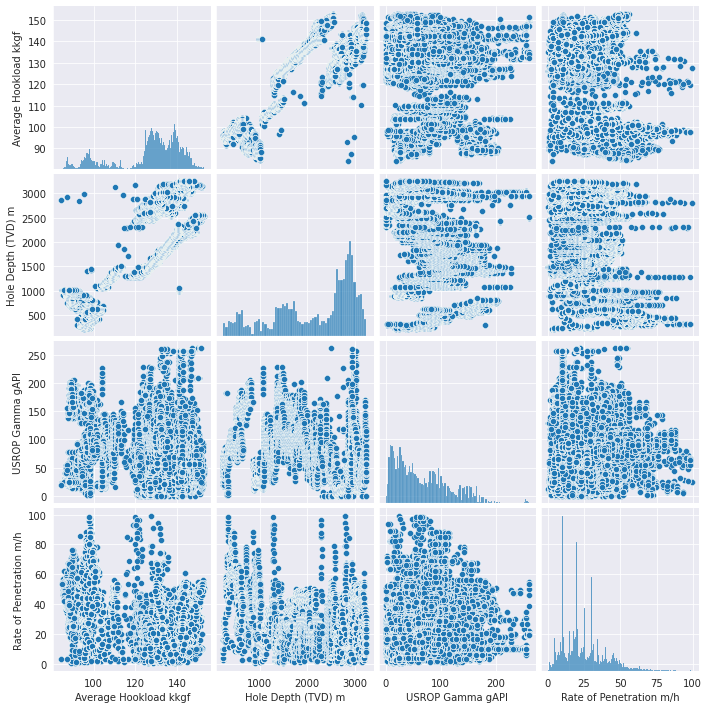

In [83]:
sns.pairplot(df[['Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI','Rate of Penetration m/h']])
plt.show()

## Preparing the Data

In [85]:
df.head(2)

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,491.033,5.842270,9440.922214,0.244047,42.864024,84.0,2784.321942,1.21,311.15,93.780222,490.760309,150.88
1,491.185,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88


> Defining target and data values

In [86]:
data=df.drop(columns=['Rate of Penetration m/h'])
target=df['Rate of Penetration m/h']

> Scaling the data 

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [88]:
data_sc=sc.fit_transform(data)

In [90]:
data_sc[:1]

array([[-1.80108303, -0.06209758, -1.89079231, -1.95953831, -1.36739548,
        -0.08456872, -0.62235617,  0.13632423, -2.16845476, -1.96436003,
         1.65642237]])

> Splittig into train and test data

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_sc,target,test_size=0.2,random_state=42)

In [92]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(159142, 11) (39786, 11) (159142,) (39786,)


## Model

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

> Model

In [97]:
knn=KNeighborsRegressor(n_neighbors=12)

> Train

In [100]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

- Train scores

In [101]:
print("r2_score:",r2_score(knn.predict(x_train),y_train))
print("MAE:",mean_absolute_error(knn.predict(x_train),y_train))

r2_score: 0.9793044365178408
MAE: 0.832092033535031


> Test

In [102]:
pred_knn=knn.predict(x_test)

- Test scores

In [103]:
print("r2_score:",r2_score(pred_knn,y_test))
print("MAE:",mean_absolute_error(pred_knn,y_test))

r2_score: 0.9739840193035756
MAE: 0.9569240265605099


> Results for testing

In [104]:
pd.DataFrame({'Actual':y_test,'Predicted':pred_knn}).iloc[:10]

,Actual,Predicted
95319,29.958792,23.865332
99368,23.255935,20.880222
131291,25.853136,28.375987
162157,10.030054,10.026117
97546,18.462955,17.319142
139339,25.054560,25.039320
128186,15.008352,15.859481
126134,23.652480,22.361144
111287,28.610966,28.778276
27444,42.369999,44.271667


In [138]:
x,y=pd.DataFrame(y_test),pd.DataFrame(pred_knn)
print(x.describe(),y.describe())

       Rate of Penetration m/h
count             39786.000000
mean                 25.055377
std                  15.131483
min                   0.330000
25%                  13.300000
50%                  21.330000
75%                  32.474830
max                  99.206304                   0
count  39786.000000
mean      25.105104
std       14.927703
min        0.330000
25%       13.702500
50%       21.722417
75%       32.490002
max       98.110001


In [110]:
a=np.arange(39786)
print(a.shape)

(39786,)


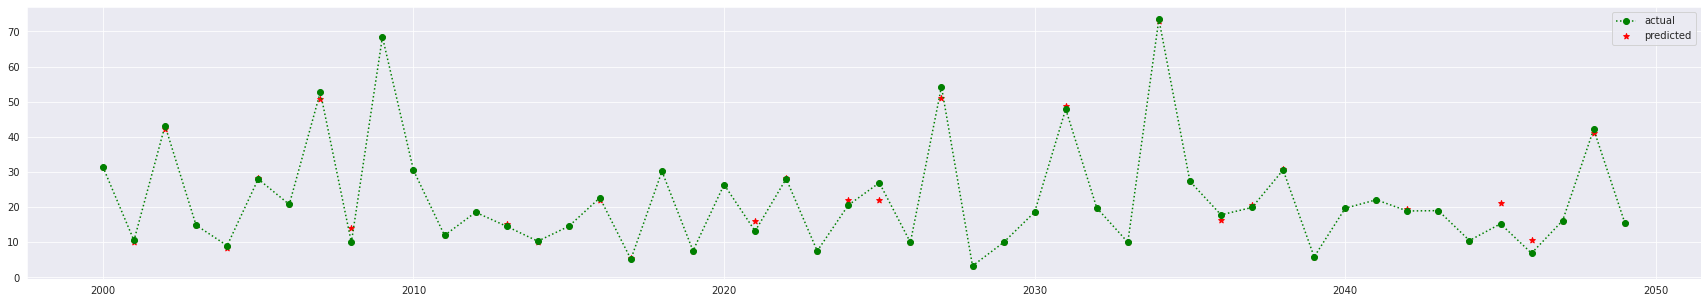

In [140]:
plt.figure(figsize=(30,5))
plt.plot(a[2000:2050],y_test[2000:2050],c='green',marker="o",label='actual',linestyle=':')
plt.scatter(a[2000:2050],pred_knn[2000:2050],c='red',marker="*",label='predicted')
plt.legend()
plt.show()

> Learning Curve

In [124]:
from sklearn.model_selection import learning_curve,KFold

In [125]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [126]:
train_size,train_score,test_score=learning_curve(estimator=knn,X=x_train,y=y_train,cv=kf)

In [127]:
train_size

array([ 14322,  46548,  78774, 111000, 143227])

In [128]:
train_mean=np.mean(train_score,axis=1)
train_mean

array([0.90359389, 0.94946302, 0.96417714, 0.9728395 , 0.97790028])

In [129]:
test_mean=np.mean(test_score,axis=1)
test_mean

array([0.88247735, 0.93853022, 0.95605721, 0.96602092, 0.97200036])

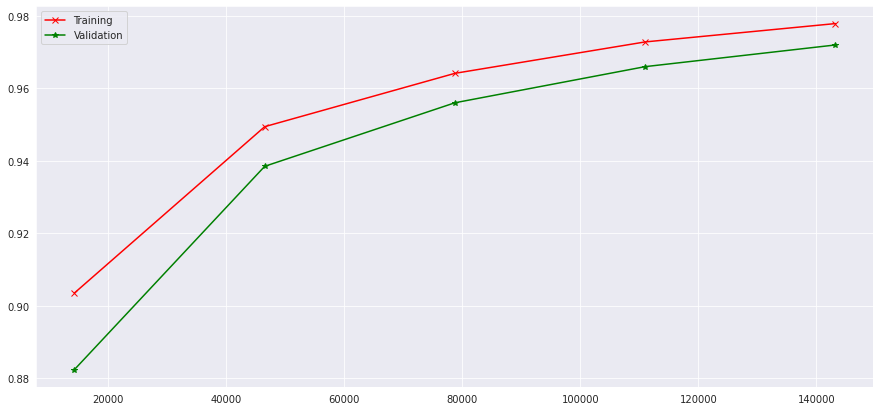

In [132]:
plt.figure(figsize=(15,7))
plt.plot(train_size,train_mean,color='red',marker='x',label='Training')
plt.plot(train_size,test_mean,color='green',marker='*',label='Validation')
plt.legend()
plt.show()

### Testing on final test data

In [141]:
test_sc=sc.fit_transform(test)

In [142]:
test_sc[:1]

array([[-3.26966502,  0.79986125,  0.87706374,  0.26191302,  0.21864586,
         0.66390258, -0.14065803, -0.30628342,  0.2953563 , -4.92630838,
        -0.33133026]])

In [143]:
pred_final=knn.predict(test_sc)
pred_final[:10]

array([34.95083261, 34.95083261, 34.95083261, 34.95083261, 34.95083261,
       34.95083261, 34.95083261, 34.95083261, 34.95083261, 34.95083261])

In [146]:
pred_final=pd.DataFrame(pred_final)
pred_final.columns=['Rate of Penetration']
pred_final.sample(10)

,Rate of Penetration
69509,8.320000
27607,11.387952
67909,11.420000
46354,4.690000
1531,4.870000
78972,6.363716
51916,7.510000
14079,17.012158
42307,19.319748
95404,23.692815


In [147]:
pred_final.describe()

,Rate of Penetration
count,114299.000000
mean,18.909025
std,11.719048
min,1.160000
25%,9.370060
50%,16.966946
75%,23.708868
max,73.240001


> Saving to csv

In [158]:
pred_final.to_csv('KNN_final_12.csv',index=False,float_format='%f')

> Saving the model

In [149]:
pkl_name='Pickle_knn_model.pkl'

with open(pkl_name,'wb') as file:
  pickle.dump(knn,file)

In [150]:
#load

with open(pkl_name,'rb') as file:
  loaded_pkl_knn=pickle.load(file)
loaded_pkl_knn


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

In [151]:
loaded_pkl_knn.score(x_test,y_test)

0.9746800274071546

In [152]:
loaded_pkl_knn.predict(x_test)

array([23.865332  , 20.8802224 , 28.37598732, ..., 48.4099999 ,
        3.924046  , 20.513548  ])

> Saving requirements

In [153]:
!pip freeze > requirements.txt

### Model Performance

In [155]:
mae_test=[]
mae_train=[]
for k in range(4,30):
  k=k+1
  model=KNeighborsRegressor(n_neighbors=k)

  model.fit(x_train,y_train)
  pred_train=model.predict(x_train)
  pred=model.predict(x_test)
  error_train=mean_absolute_error(y_train,pred_train)
  mae_train.append(error_train)
  error_test=mean_absolute_error(y_test,pred)
  mae_test.append(error_test)
  print("For k=",k,"Train error:",error_train," Test error:",error_test,"Diffrenece:",(error_test-error_train))

For k= 5 Train error: 0.3100681432149529  Test error: 0.48546337421606617 Diffrenece: 0.17539523100111326
For k= 6 Train error: 0.4094004145866517  Test error: 0.573640134032667 Diffrenece: 0.1642397194460153
For k= 7 Train error: 0.49744977309306704  Test error: 0.6514570193919477 Diffrenece: 0.15400724629888063
For k= 8 Train error: 0.5778075383946955  Test error: 0.7232357187695704 Diffrenece: 0.14542818037487493
For k= 9 Train error: 0.6498623640649303  Test error: 0.7898998026264461 Diffrenece: 0.14003743856151585
For k= 10 Train error: 0.7146513619948192  Test error: 0.8493794818314211 Diffrenece: 0.13472811983660193
For k= 11 Train error: 0.7754971849449424  Test error: 0.9052682127682495 Diffrenece: 0.12977102782330718
For k= 12 Train error: 0.832092033535031  Test error: 0.9569240265605099 Diffrenece: 0.12483199302547887
For k= 13 Train error: 0.8857620052905011  Test error: 1.0064938938329089 Diffrenece: 0.1207318885424078
For k= 14 Train error: 0.9328714466293283  Test error

In [156]:
diff=[]
for i in range(len(mae_test)):
  d=mae_test[i]-mae_train[i]
  diff.append(d)

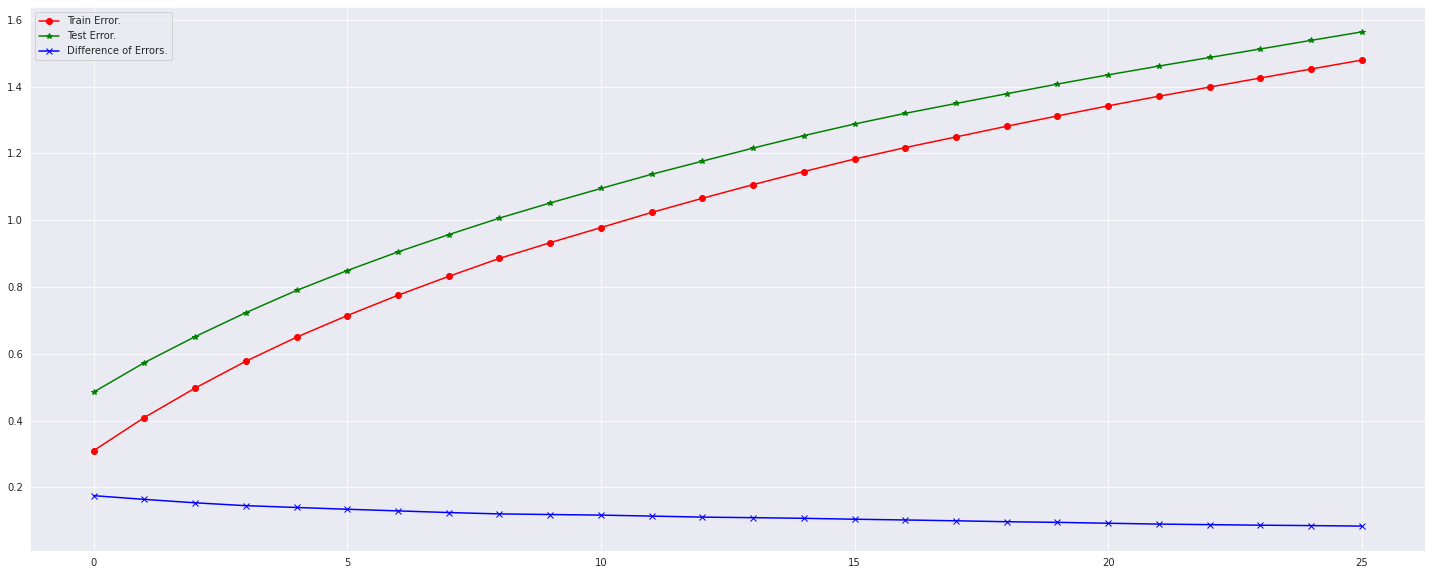

In [157]:
plt.figure(figsize=(25,10))
plt.plot(mae_train,color='Red',label="Train Error.",marker='o')
plt.plot(mae_test,color='green',label="Test Error.",marker='*')
plt.plot(diff,color='blue',marker='x',label='Difference of Errors.')
plt.legend()
plt.show()